In [1]:
from scipy.io import loadmat 
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
data=loadmat('machine-learning-ex3\ex3\ex3data1.mat')

In [27]:
X=data['X']
y=data['y']

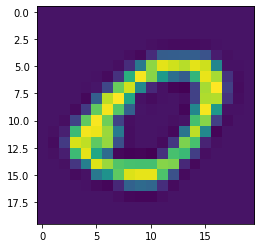

In [10]:
plt.imshow(X[0].reshape((20,20)))

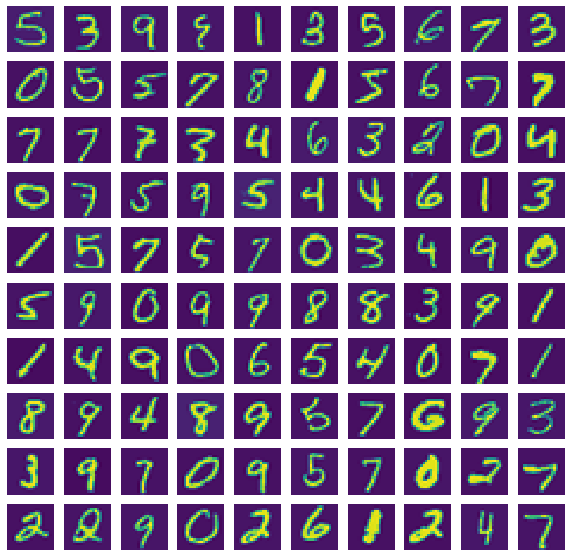

In [18]:
fiz,ax=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20),order='F'))
        ax[i][j].axis('off')

In [28]:
m=len(y)
k=10
ones=np.ones([m,1])
X=np.hstack((ones,X))
y=y[:,np.newaxis]
m,n=X.shape

In [29]:
print(X.shape,y.shape)

(5000, 401) (5000, 1)


In [30]:
theta=np.zeros([k,n])

In [33]:
print(X.shape,y.shape,theta.shape)

(5000, 401) (5000, 1) (10, 401)


In [34]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [59]:
def costfunction(theta,X,y,lmbda):
    temp=np.dot(y.T,np.log(sigmoid(np.dot(X,theta))))+np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta))))
    return (temp/(-m))+np.sum(theta[1:]**2)*((lmbda)/(2*m))

In [63]:
def gradient(theta,X,y,lmbda):
    temp=sigmoid(np.dot(X,theta))-y
    temp=(np.dot(X.T,temp)/m)+theta * lmbda / m
    temp[0]=temp[0]-theta[0] * lmbda / m
    return temp

In [64]:
lmbda =0.1
k=10
theta=np.zeros((k,n))

for i in range(k):
    digit_class=i if i else 10
    theta[i]=opt.fmin_cg(f=costfunction,x0=theta[i],fprime=gradient,args=(X,(y==digit_class).flatten(),lmbda),maxiter=50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.013492
         Iterations: 50
         Function evaluations: 187
         Gradient evaluations: 187
         Current function value: 0.056458
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061957
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037402
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063166
         Iterations: 50
         Function evaluations: 133
         Gradient evaluations: 133
         Current function value: 0.020024
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033607
      

In [82]:
pred = np.argmax(X @ theta.T, axis = 1)

In [83]:
np.argmax((X@theta.T)[2555])

5

In [88]:
sigmoid(X@theta.T)[2555]>0.5

array([False, False, False, False, False,  True, False, False, False,
       False])